# EDA - Warehouse and Retail Sales - Montgomery County of Maryland
This dataset contains a list of sales and movement data by item and department appended monthly. 

Update Frequency: Monthly

- Let's explore csv file available at https://catalog.data.gov/dataset/warehouse-and-retail-sales
- Basic data profiling to understand data to help formulate data engineering ETL or ELT plan - pipelines, ingestion, transformation etc.

Uncomment and run below cell only once to get data

In [1]:
# # Get the data
# !mkdir data
# !cd data
# !wget https://data.montgomerycountymd.gov/api/views/v76h-r7br/rows.csv?accessType=DOWNLOAD
# !mv rows.csv\?accessType\=DOWNLOAD warehouse_and_retail_sales.csv
# ! cd ..

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/warehouse_and_retail_sales.csv')
df.shape

(307645, 9)

In [4]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [5]:
# Convert column names to lowercase and replace spaces with underscores
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [6]:
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [7]:
# check for missing values
df.isnull().sum()

year                  0
month                 0
supplier            167
item_code             0
item_description      0
item_type             1
retail_sales          3
retail_transfers      0
warehouse_sales       0
dtype: int64

In [8]:
df['supplier'].value_counts()

supplier
REPUBLIC NATIONAL DISTRIBUTING CO       20995
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
                                        ...  
G GAUTHIER CELLARS INC                      1
GJS SALES INC                               1
BLACK ANKLE VINEYARDS LLC                   1
CALVERT BREWING COMPANY                     1
PACIFIC RIM WINEMAKERS                      1
Name: count, Length: 396, dtype: int64

In [9]:
df['item_type'].value_counts()

item_type
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: count, dtype: int64

In [10]:
df['retail_sales'].value_counts()

retail_sales
0.00      121702
0.08       10664
0.17        6819
0.16        6091
0.24        3921
           ...  
90.03          1
94.11          1
368.64         1
79.52          1
372.45         1
Name: count, Length: 10674, dtype: int64

### Data cleaning

In [11]:
df['supplier'] = df['supplier'].fillna("NO SUPPLIER")
df['item_type'] = df['item_type'].fillna("NO ITEM TYPE")
df['retail_sales'] = df['retail_sales'].fillna(-1)

In [12]:
df.isnull().sum()

year                0
month               0
supplier            0
item_code           0
item_description    0
item_type           0
retail_sales        0
retail_transfers    0
warehouse_sales     0
dtype: int64

In [13]:
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [14]:
df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales
count,307645.000000,307645.000000,307645.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.023993,6.936465,25.294597
std,1.083061,3.461812,30.986097,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [15]:
df.dtypes

year                  int64
month                 int64
supplier             object
item_code            object
item_description     object
item_type            object
retail_sales        float64
retail_transfers    float64
warehouse_sales     float64
dtype: object

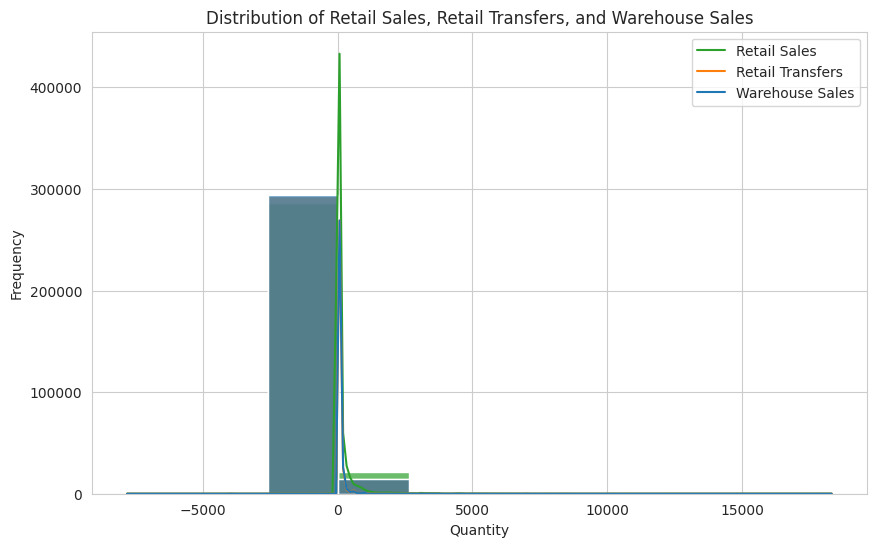

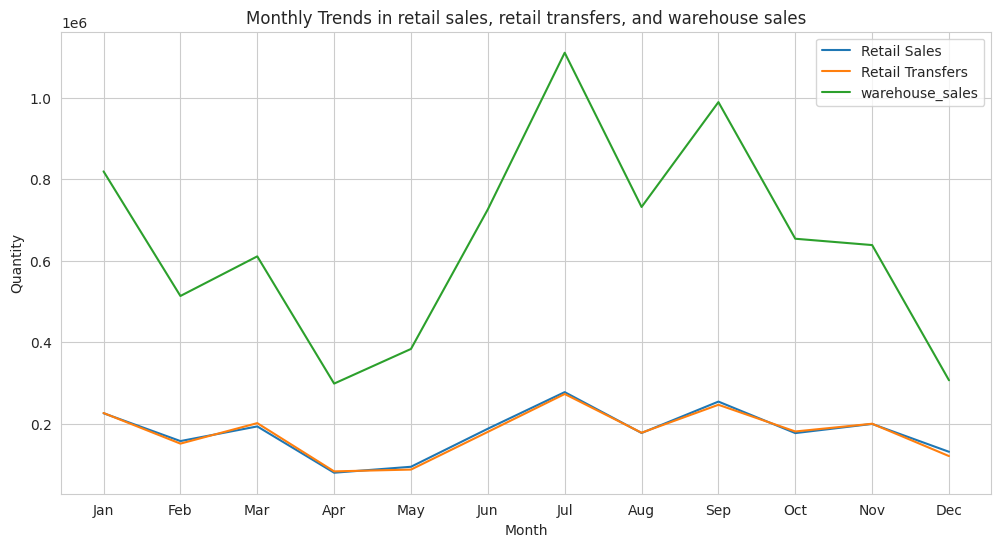

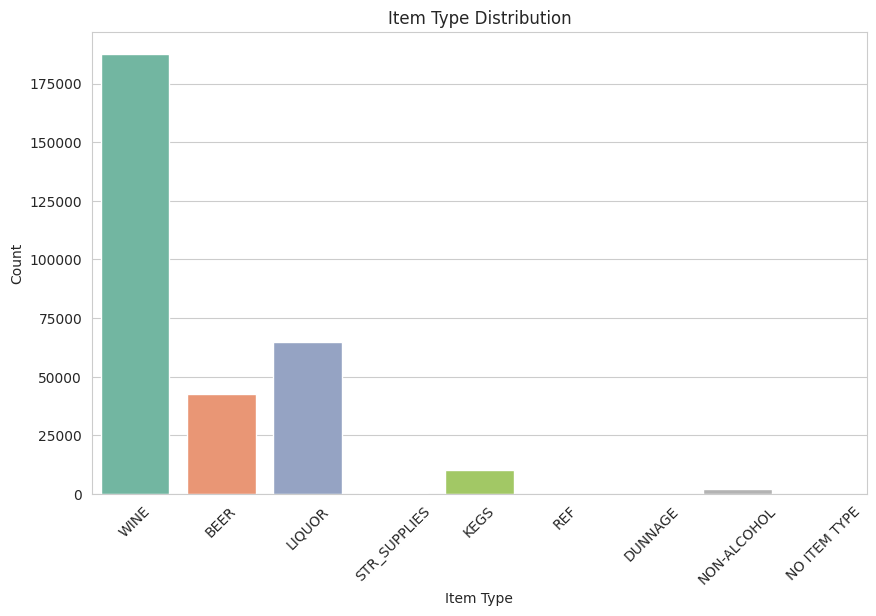

In [16]:
# Set Seaborn style
sns.set_style("whitegrid")

# Distribution of retail sales, retail transfers, and warehouse sales
plt.figure(figsize=(10, 6))
sns.histplot(data=df[['retail_sales', 'retail_transfers', 'warehouse_sales']], kde=True, bins=10, alpha=0.7)
plt.title('Distribution of Retail Sales, Retail Transfers, and Warehouse Sales')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['Retail Sales', 'Retail Transfers', 'Warehouse Sales'])
plt.show()

# Monthly trends in retail sales and transfers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='retail_sales', estimator=sum, errorbar=None)
sns.lineplot(data=df, x='month', y='retail_transfers', estimator=sum, errorbar=None)
sns.lineplot(data=df, x='month', y='warehouse_sales', estimator=sum, errorbar=None)
plt.title('Monthly Trends in retail sales, retail transfers, and warehouse sales')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(['Retail Sales', 'Retail Transfers', 'warehouse_sales'])
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Item type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='item_type', hue='item_type', palette='Set2')
plt.title('Item Type Distribution')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
